In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('res_sum.csv')

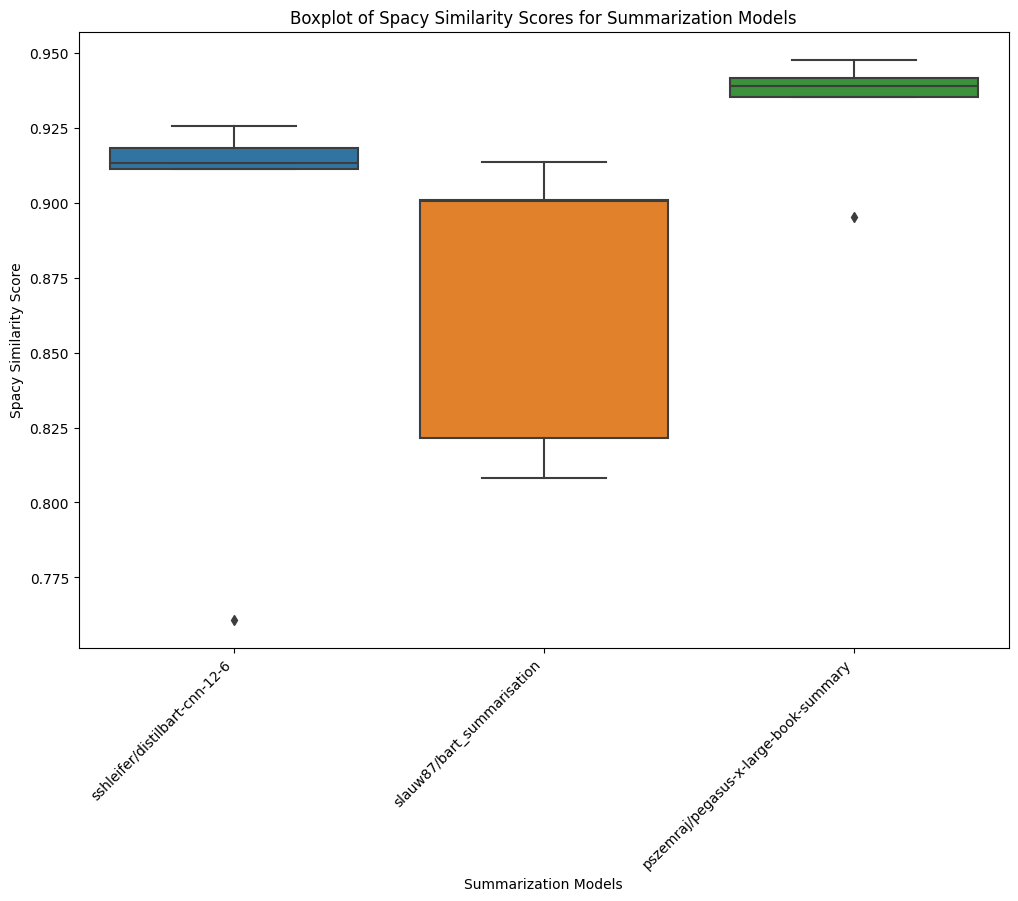

In [3]:
plt.figure(figsize=(12, 8))

model_name = df['model_name']
sns.boxplot(x=model_name, y='spacy_sim', data=df)
plt.title('Boxplot of Spacy Similarity Scores for Summarization Models')
plt.xlabel('Summarization Models')
plt.ylabel('Spacy Similarity Score')
plt.xticks(rotation=45, ha='right') 
plt.show()

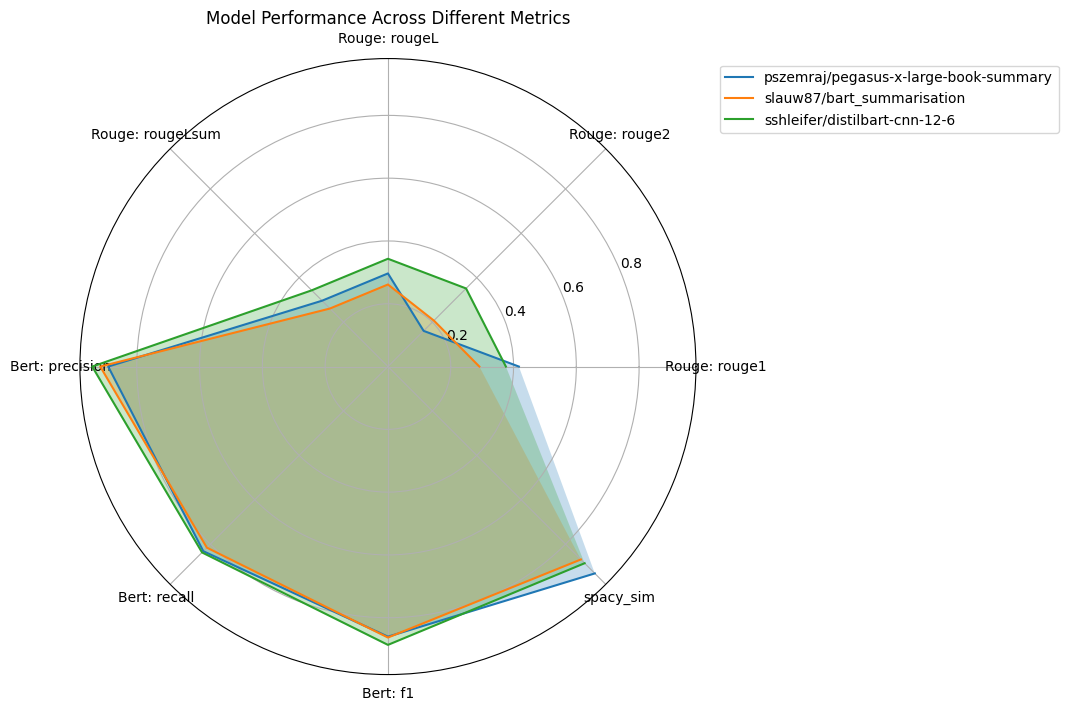

In [12]:
metrics = ['Rouge: rouge1', 'Rouge: rouge2', 'Rouge: rougeL', 'Rouge: rougeLsum', 'Bert: precision', 'Bert: recall', 'Bert: f1', 'spacy_sim']

# Create a radar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Number of metrics
num_metrics = len(metrics)

for tr_model, group in df.groupby('model_name'):
    values = group[metrics].mean().values
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

    # Plot
    ax.plot(angles, values, label=tr_model)
    ax.fill(angles, values, alpha=0.25)

# Set the number of labels and their positions
ax.set_thetagrids(angles * 180/np.pi, labels=metrics)

ax.set_title('Model Performance Across Different Metrics')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()

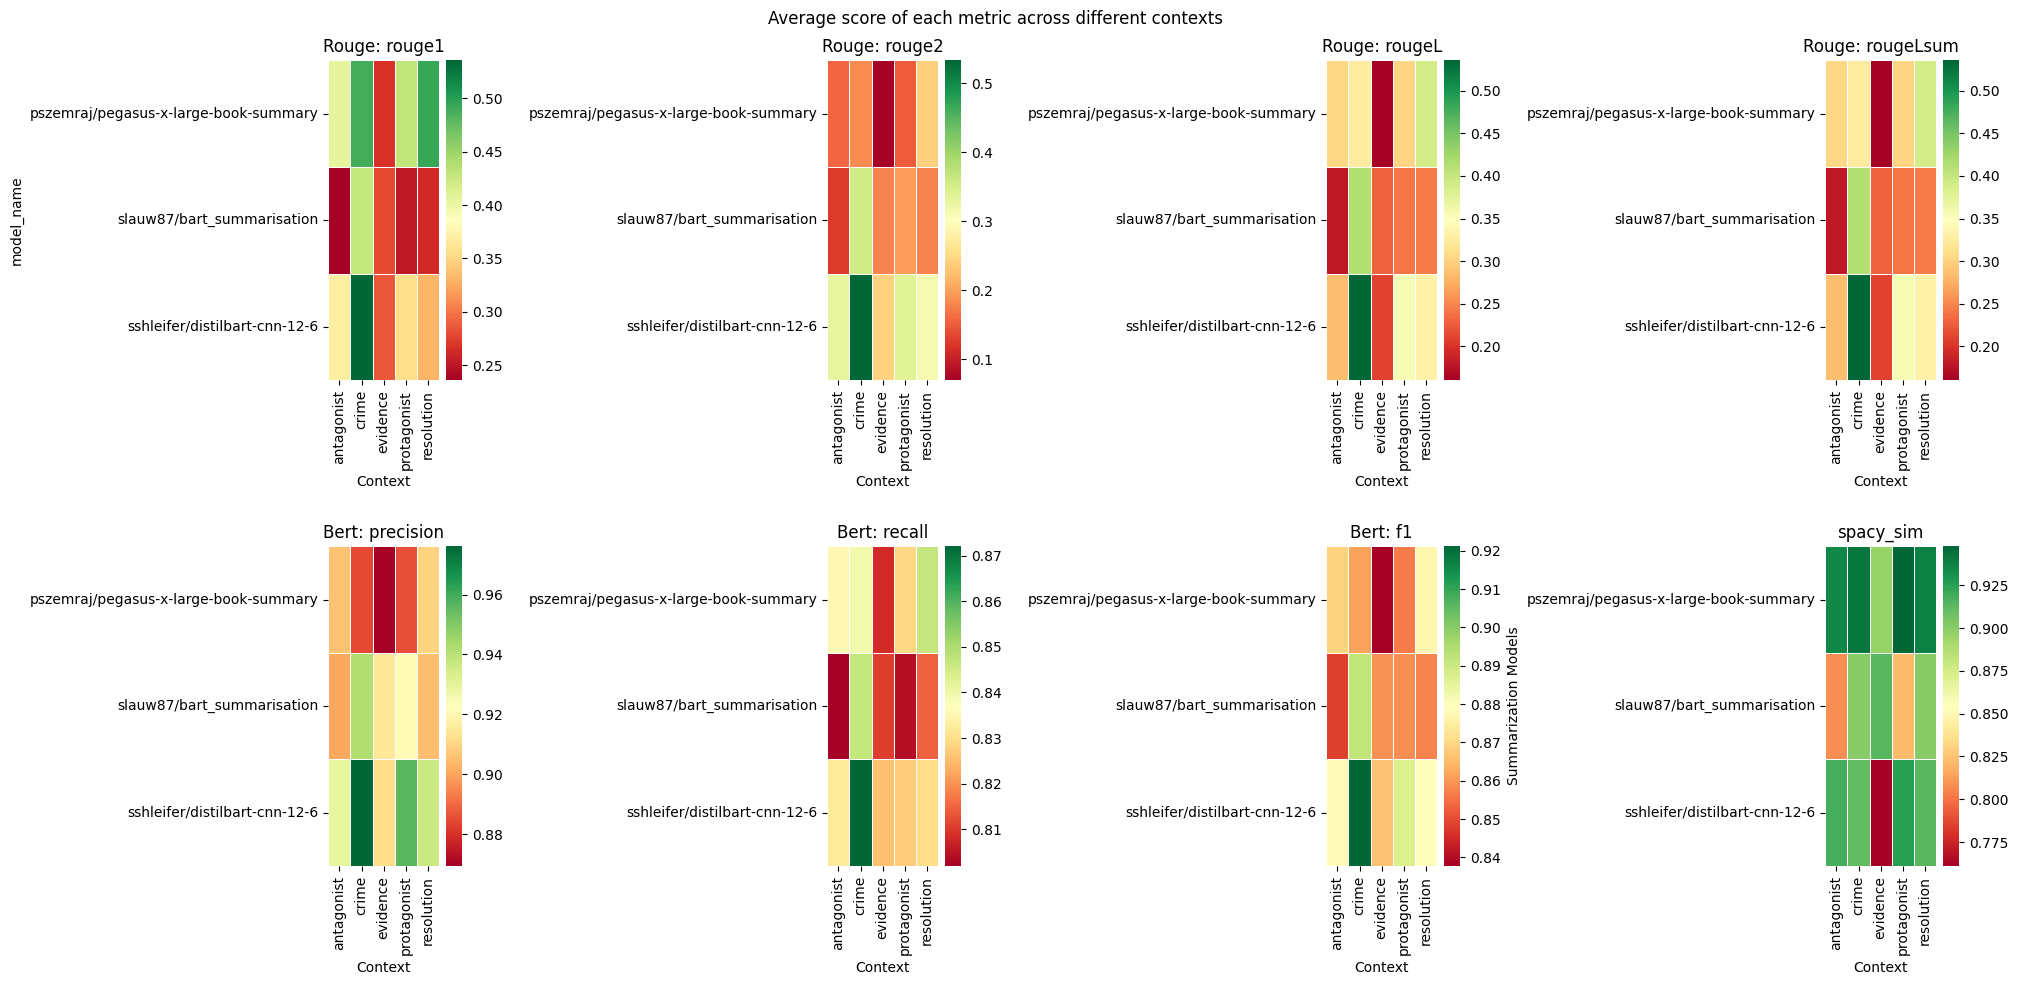

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['Rouge: rouge1', 'Rouge: rouge2', 'Rouge: rougeL', 'Rouge: rougeLsum', 'Bert: precision', 'Bert: recall', 'Bert: f1', 'spacy_sim']

# Create a single figure outside the loop
plt.figure(figsize=(20, 10))

# Iterate through metrics
for metric in metrics:
    # Create subplots
    plt.subplot(2, 4, metrics.index(metric) + 1)

    # Pivot table for the current metric
    pivot_df = df.pivot_table(index='model_name', columns='ctx_name', values=metric, aggfunc='mean')

    # Plot heatmap
    sns.heatmap(pivot_df, cmap='RdYlGn', fmt=".2f", linewidths=.5)
    plt.title(f'{metric}')
    plt.xlabel('Context')

    # Remove y-labels from all subplots except the leftmost one
    if metrics.index(metric) != 0:
        plt.ylabel('')

# Add a common y-label to the leftmost subplot
plt.ylabel('Summarization Models')
plt.suptitle('Average score of each metric across different contexts')

# Adjust layout with space between subplots
plt.tight_layout(h_pad=2.5, w_pad=2.5)
plt.show()
